In [1]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# TODO: change backend to "html" for higher resolution and interactive plots
pv_bc = "static"  # "static", "html", "client"
pv.set_jupyter_backend(pv_bc)
# pv.global_theme.trame.jupyter_extension_enabled = True
# pv.global_theme.trame.server_proxy_enabled = True
if pv_bc == "static":
    window_size = (1280*2, 600*2)
else:
    window_size = (1360, 360)
show_edges = True


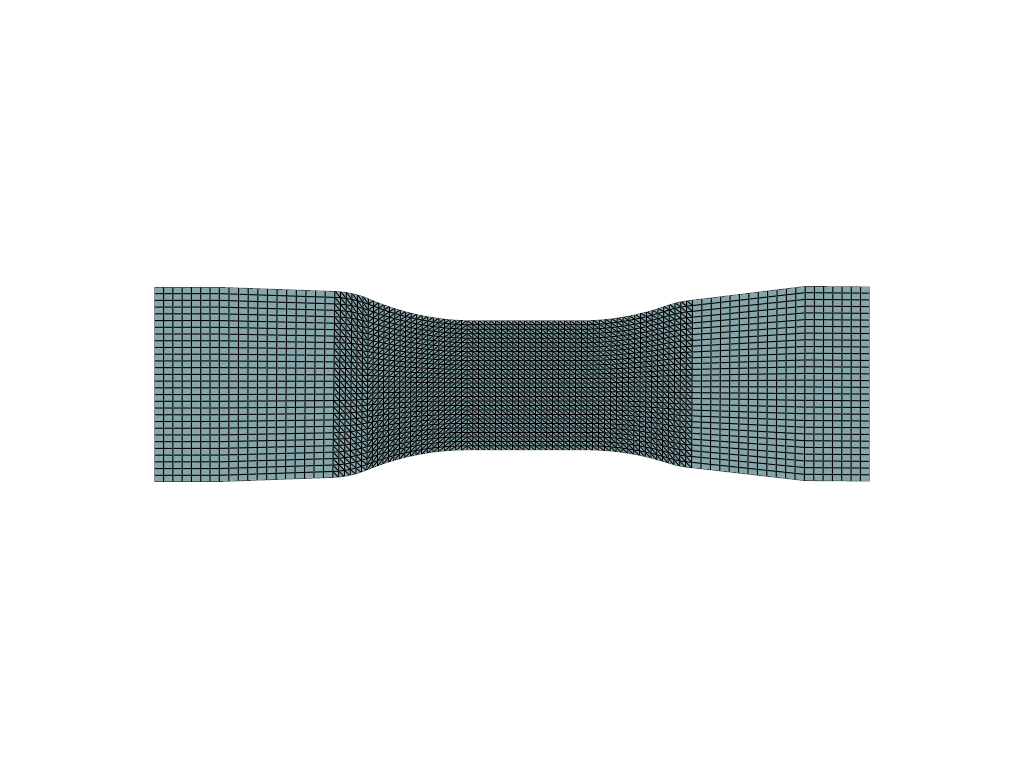

In [ ]:
# Read a VTK file
vtk_file = "./data/dogbone/dogbone.vtk"
mesh = pv.read(vtk_file)
plotter = pv.Plotter(border=False)
plotter.add_mesh(mesh, show_edges=True)
plotter.view_xy()
plotter.show()

In [ ]:

# Load an NPZ file
npz_file = "./S-NOT_DOG_BONE_RESULTS/s-not_dog_bone_results.npz"
data = np.load(npz_file)

peeq_true = data["a"]*100
stress_true = data["b"]
peeq_pred_not = data["c"]*100
stress_pred_not = data["d"]

npz_file = "./S-DON_DOG_BONE_RESULTS/s-don_dog_bone_results.npz"
data = np.load(npz_file)
# peeq_true = data["a"]
# stress_true = data["b"]
peeq_pred_don = (data["c"]*100).squeeze()
stress_pred_don = (data["d"]).squeeze()

In [5]:
# Plot the mesh
p_data = [stress_true[0], stress_pred_not[0], stress_pred_don[0]]
labels = ["True stress [MPa]", "S-NOT Stress [MPa]", "S-DON Stress [MPa]",
          "S-NOT Abs. Error [MPa]", "S-DON Abs. Error [MPa]"]


def plot_results(p_data, labels):
    p_data.append(np.abs(p_data[0]-p_data[1]))
    p_data.append(np.abs(p_data[0]-p_data[2]))
    clim_list = [[np.min(p_data[0]), np.max(p_data[0])]]*3
    id = np.argmax([np.max(p_data[3]), np.max(p_data[4])])+3
    clim_list.append([0, np.max(p_data[id])])
    clim_list.append([0, np.max(p_data[id])])

    plotter = pv.Plotter(shape=(1, 5), window_size=window_size, border=False)
    # mesh.point_data["stress"] = stress_true[0]
    for i in range(5):
        mesh_c = mesh.copy()

        plotter.subplot(0, i)
        mesh_c.point_data[labels[i]] = p_data[i]
        plotter.add_mesh(mesh_c, show_edges=False, scalars=labels[i],
                         cmap="jet", clim=clim_list[i])
        plotter.view_xy()
    plotter.show()



Text(0, 0.5, 'Frequency')

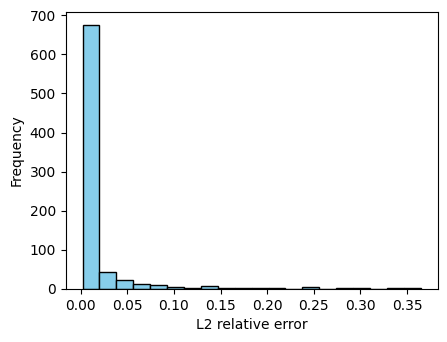

In [6]:
L2error_not_sigma = np.linalg.norm(stress_true - stress_pred_don, axis=1) / (np.linalg.norm(
    stress_true, axis=1))
sort_idx_l2 = np.argsort(L2error_not_sigma)
fig = plt.figure(figsize=(4.8, 3.6))
ax = plt.subplot(1, 1, 1)
_ = ax.hist(L2error_not_sigma[sort_idx_l2[:-5]], bins=20,
            color="skyblue", edgecolor="black")
ax.set_xlabel("L2 relative error")
ax.set_ylabel("Frequency")


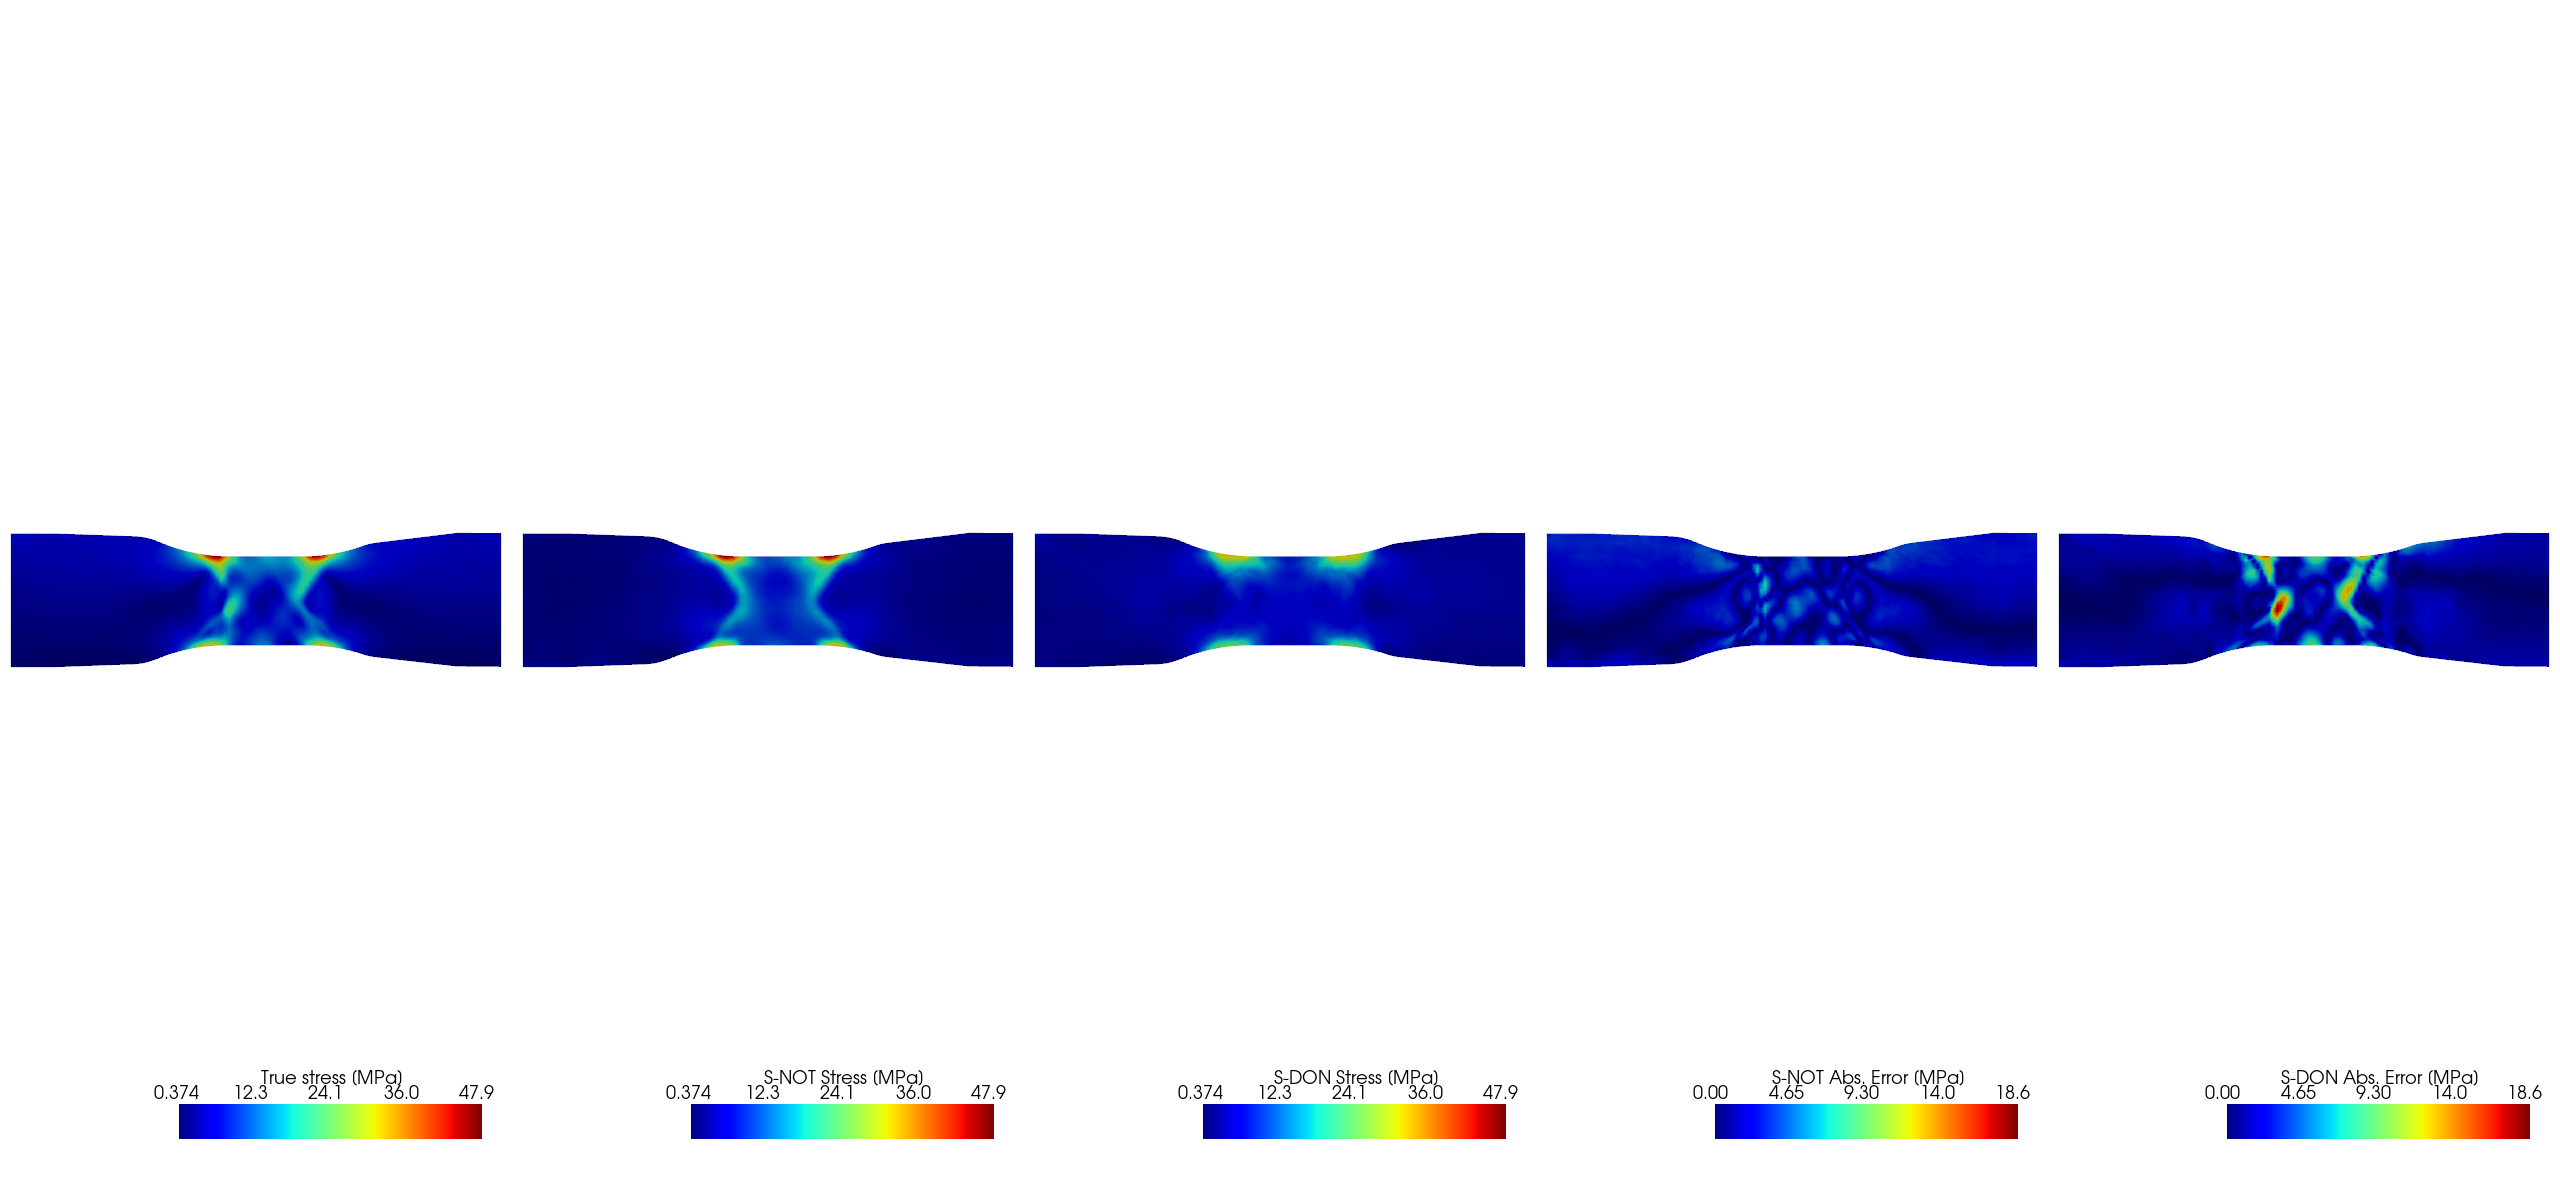

In [7]:
# plot 99th percentile of the L2 error
labels = ["True stress [MPa]", "S-NOT Stress [MPa]", "S-DON Stress [MPa]",
          "S-NOT Abs. Error [MPa]", "S-DON Abs. Error [MPa]"]
id = sort_idx_l2[int(0.99*len(sort_idx_l2))+1]
p_data = [stress_true[id], stress_pred_not[id], stress_pred_don[id]]
plot_results(p_data, labels)

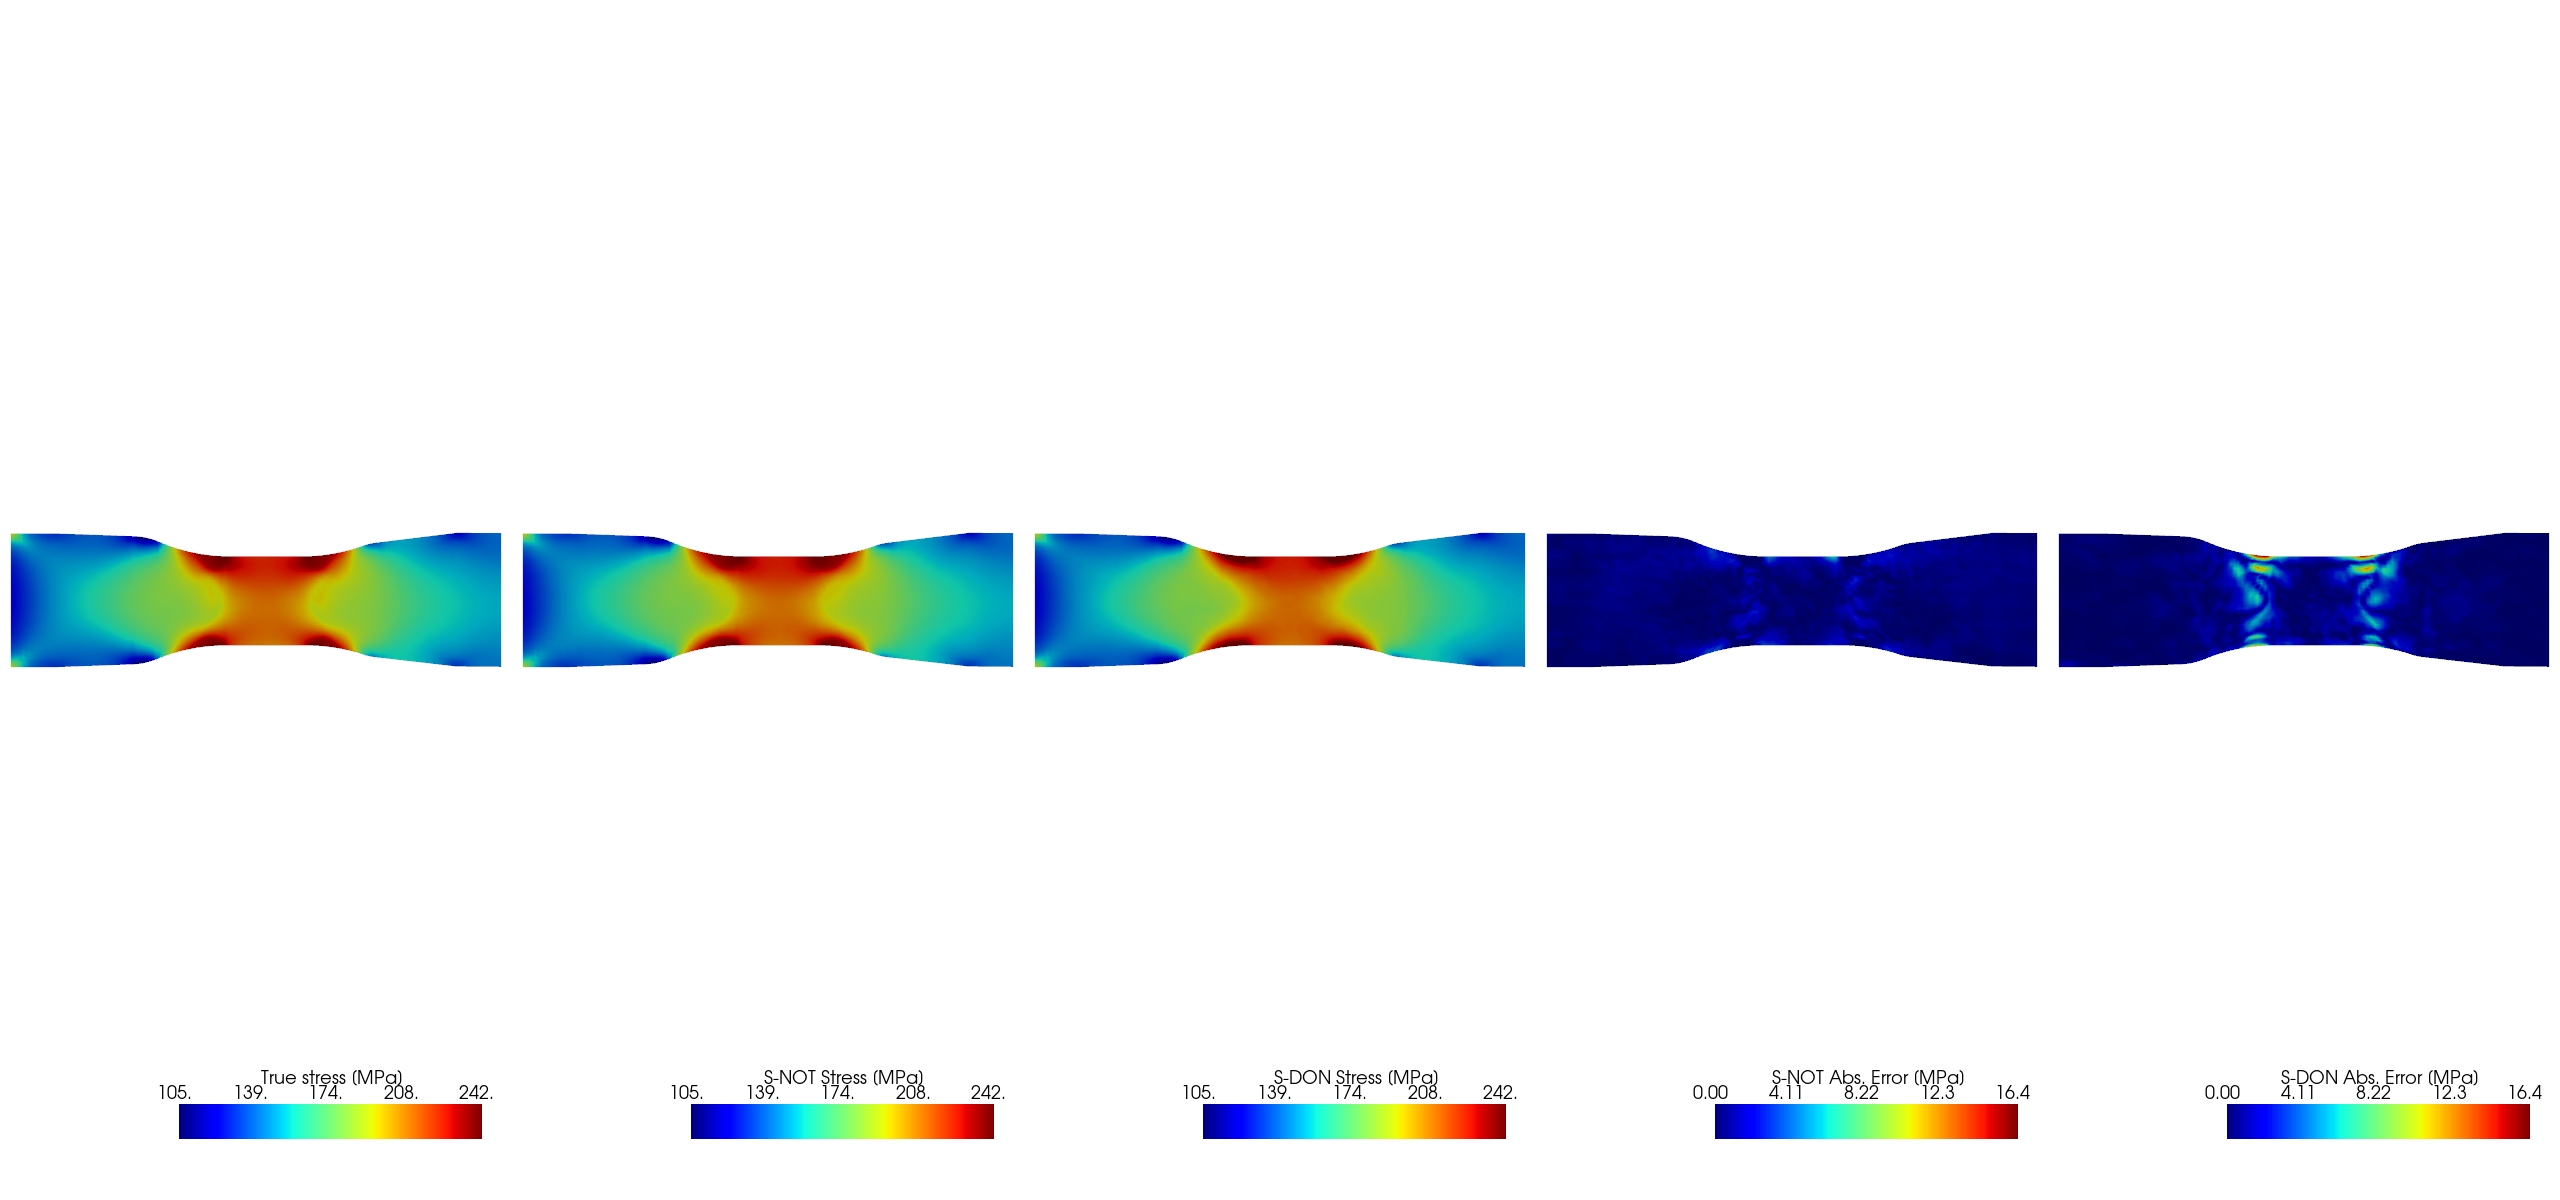

In [8]:
# plot 75th percentile of the L2 error
id = sort_idx_l2[int(0.75*len(sort_idx_l2))+1]

p_data = [stress_true[id], stress_pred_not[id], stress_pred_don[id]]
plot_results(p_data, labels)



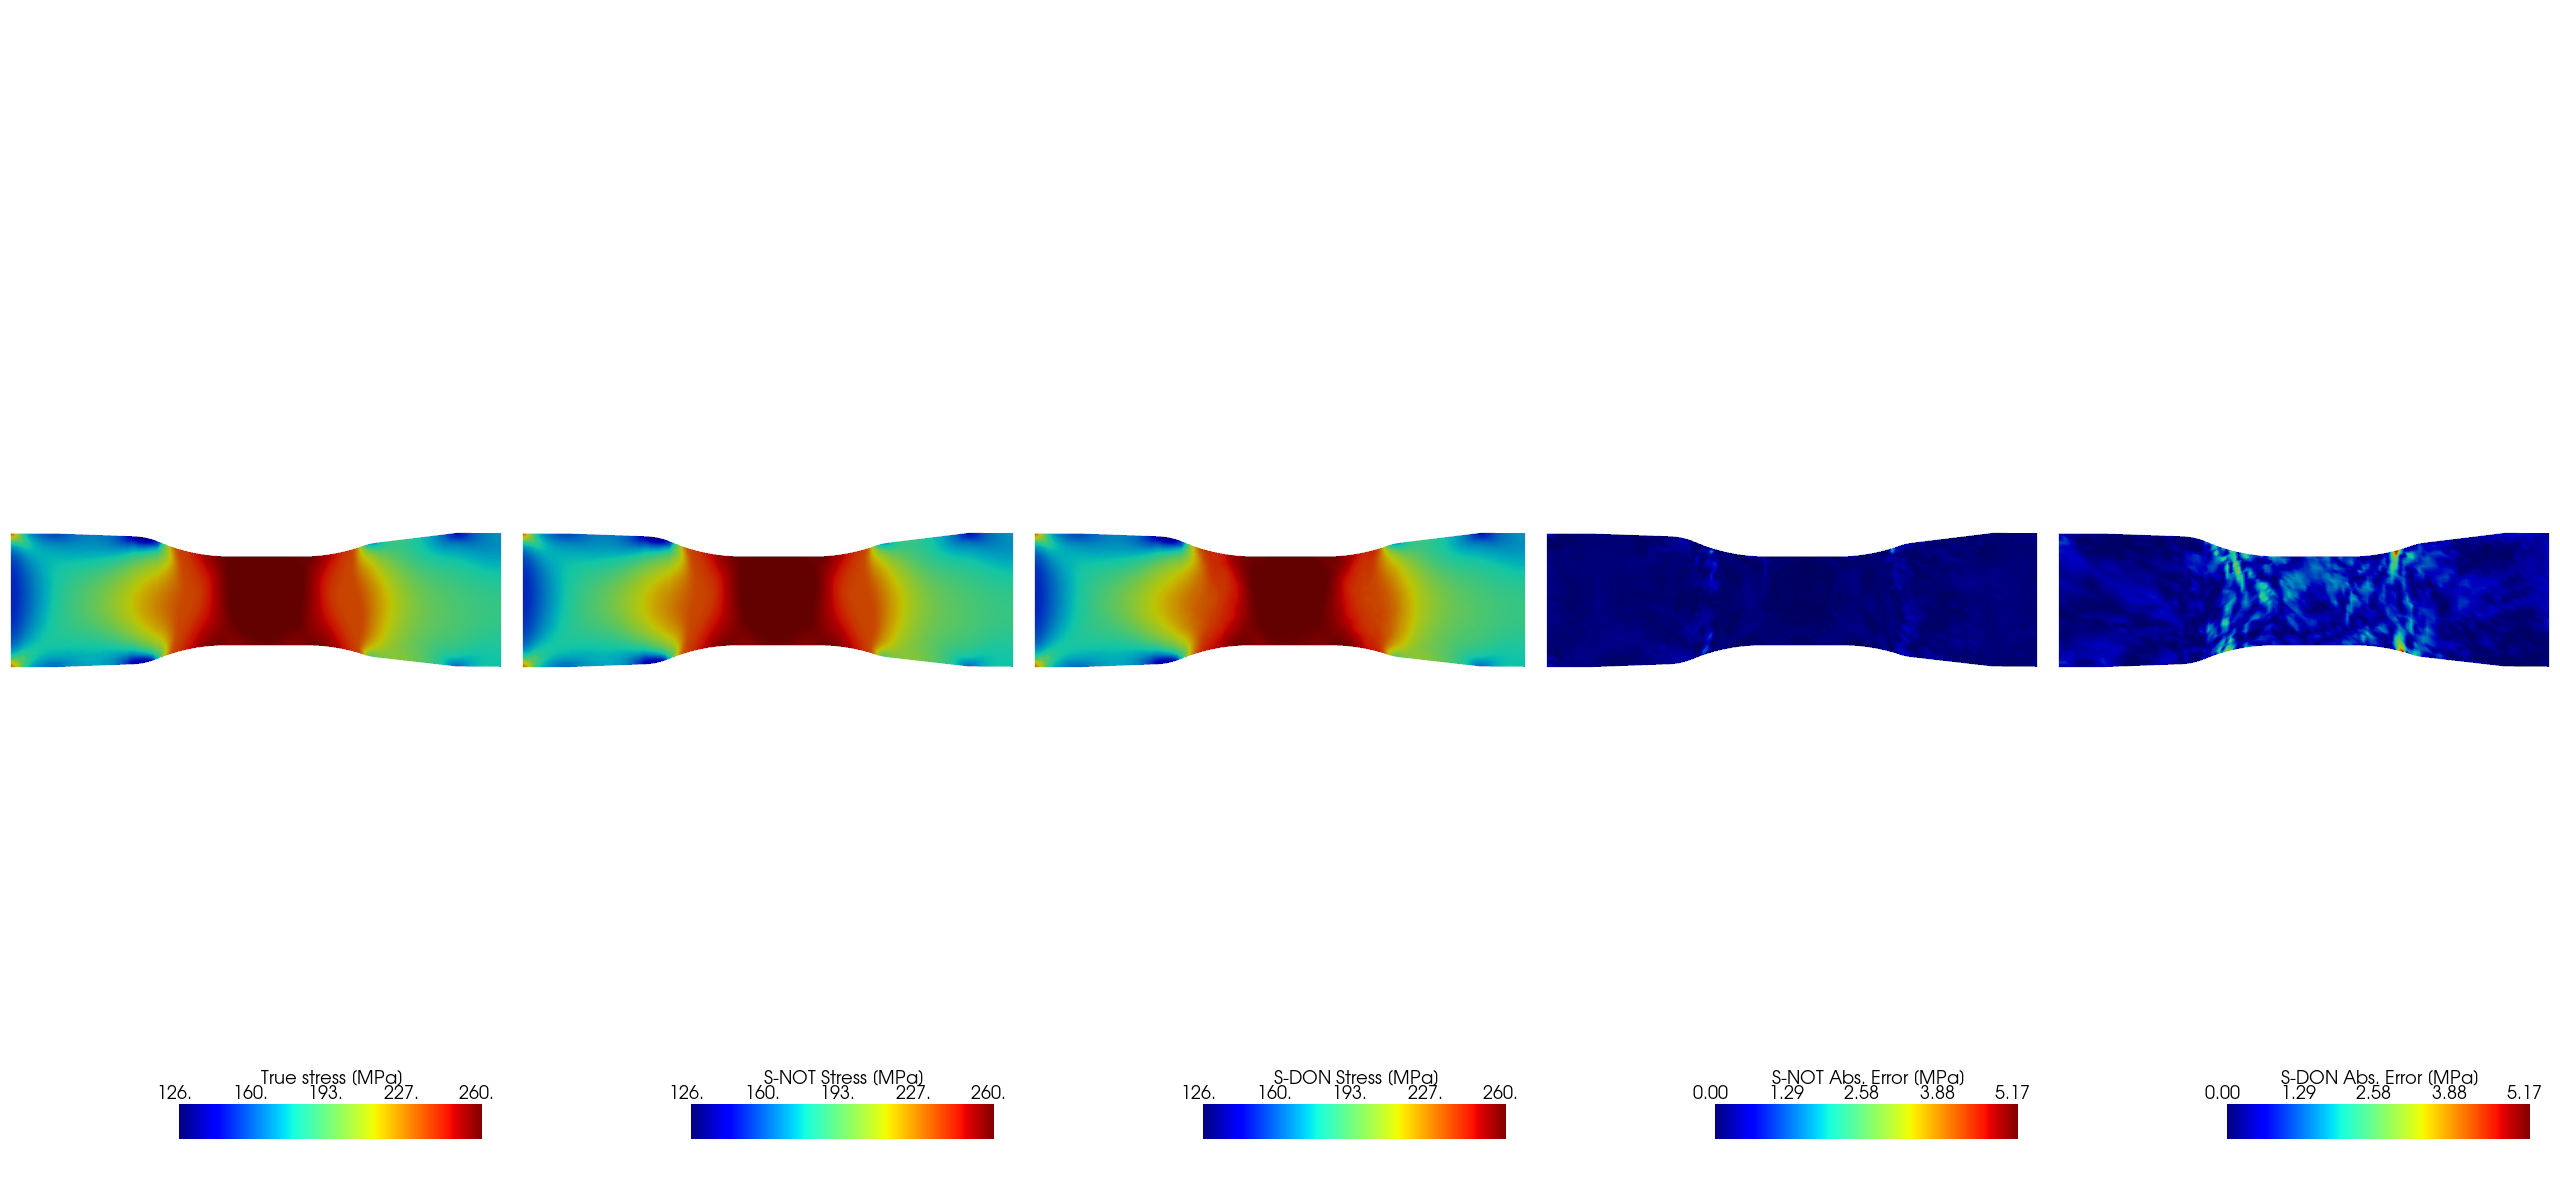

In [9]:
# plot 50th percentile of the L2 error
id = sort_idx_l2[int(0.5*len(sort_idx_l2))+1]

p_data = [stress_true[id], stress_pred_not[id], stress_pred_don[id]]
plot_results(p_data, labels)



Text(0, 0.5, 'Frequency')

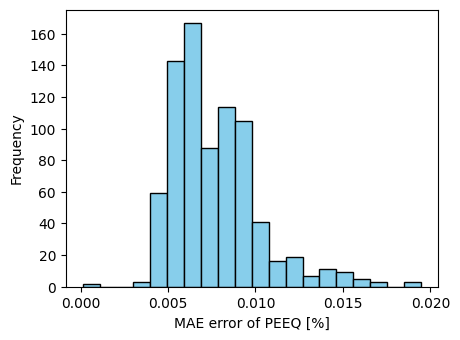

In [10]:
abs_error_p = np.abs(peeq_true - peeq_pred_don)
mae_p = np.mean(abs_error_p, axis=1)
sort_idx_mae = np.argsort(mae_p)
fig = plt.figure(figsize=(4.8, 3.6))
ax = plt.subplot(1, 1, 1)
_ = ax.hist(mae_p[sort_idx_mae[:-5]], bins=20,
            color="skyblue", edgecolor="black")
ax.set_xlabel("MAE error of PEEQ [%]")
ax.set_ylabel("Frequency")



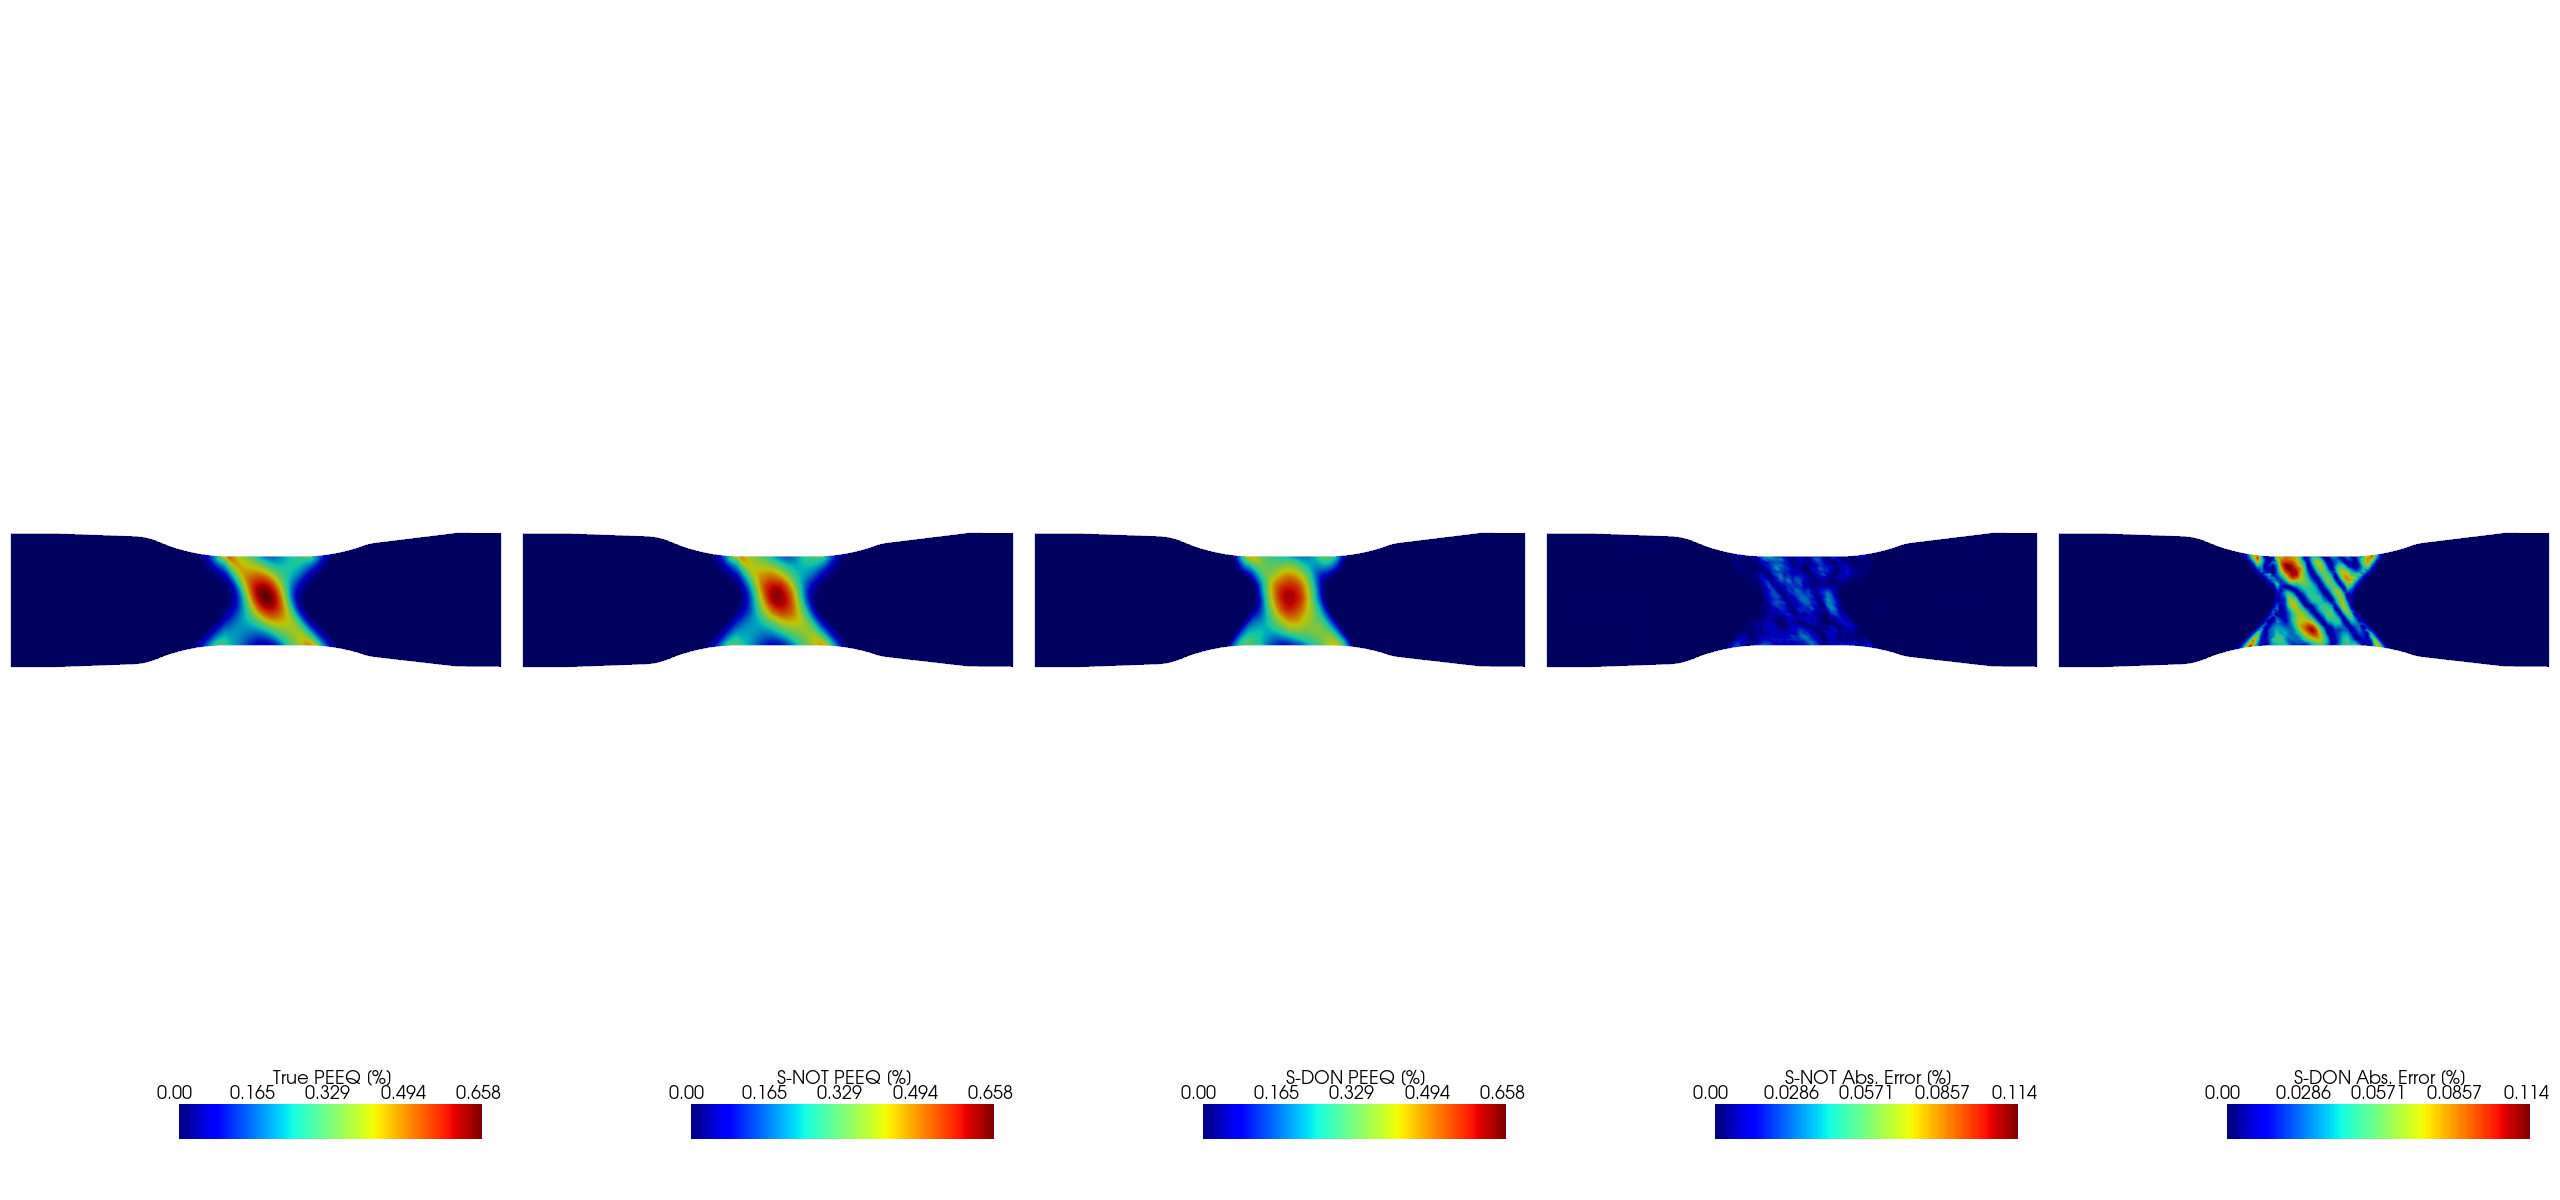

In [11]:
# plot 99th percentile of the MAE error of PEEQ
labels = ["True PEEQ [%]", "S-NOT PEEQ [%]", "S-DON PEEQ [%]",
          "S-NOT Abs. Error [%]", "S-DON Abs. Error [%]"]
id = sort_idx_l2[int(0.99*len(sort_idx_l2))+1]
p_data = [peeq_true[id], peeq_pred_not[id], peeq_pred_don[id]]
plot_results(p_data, labels)


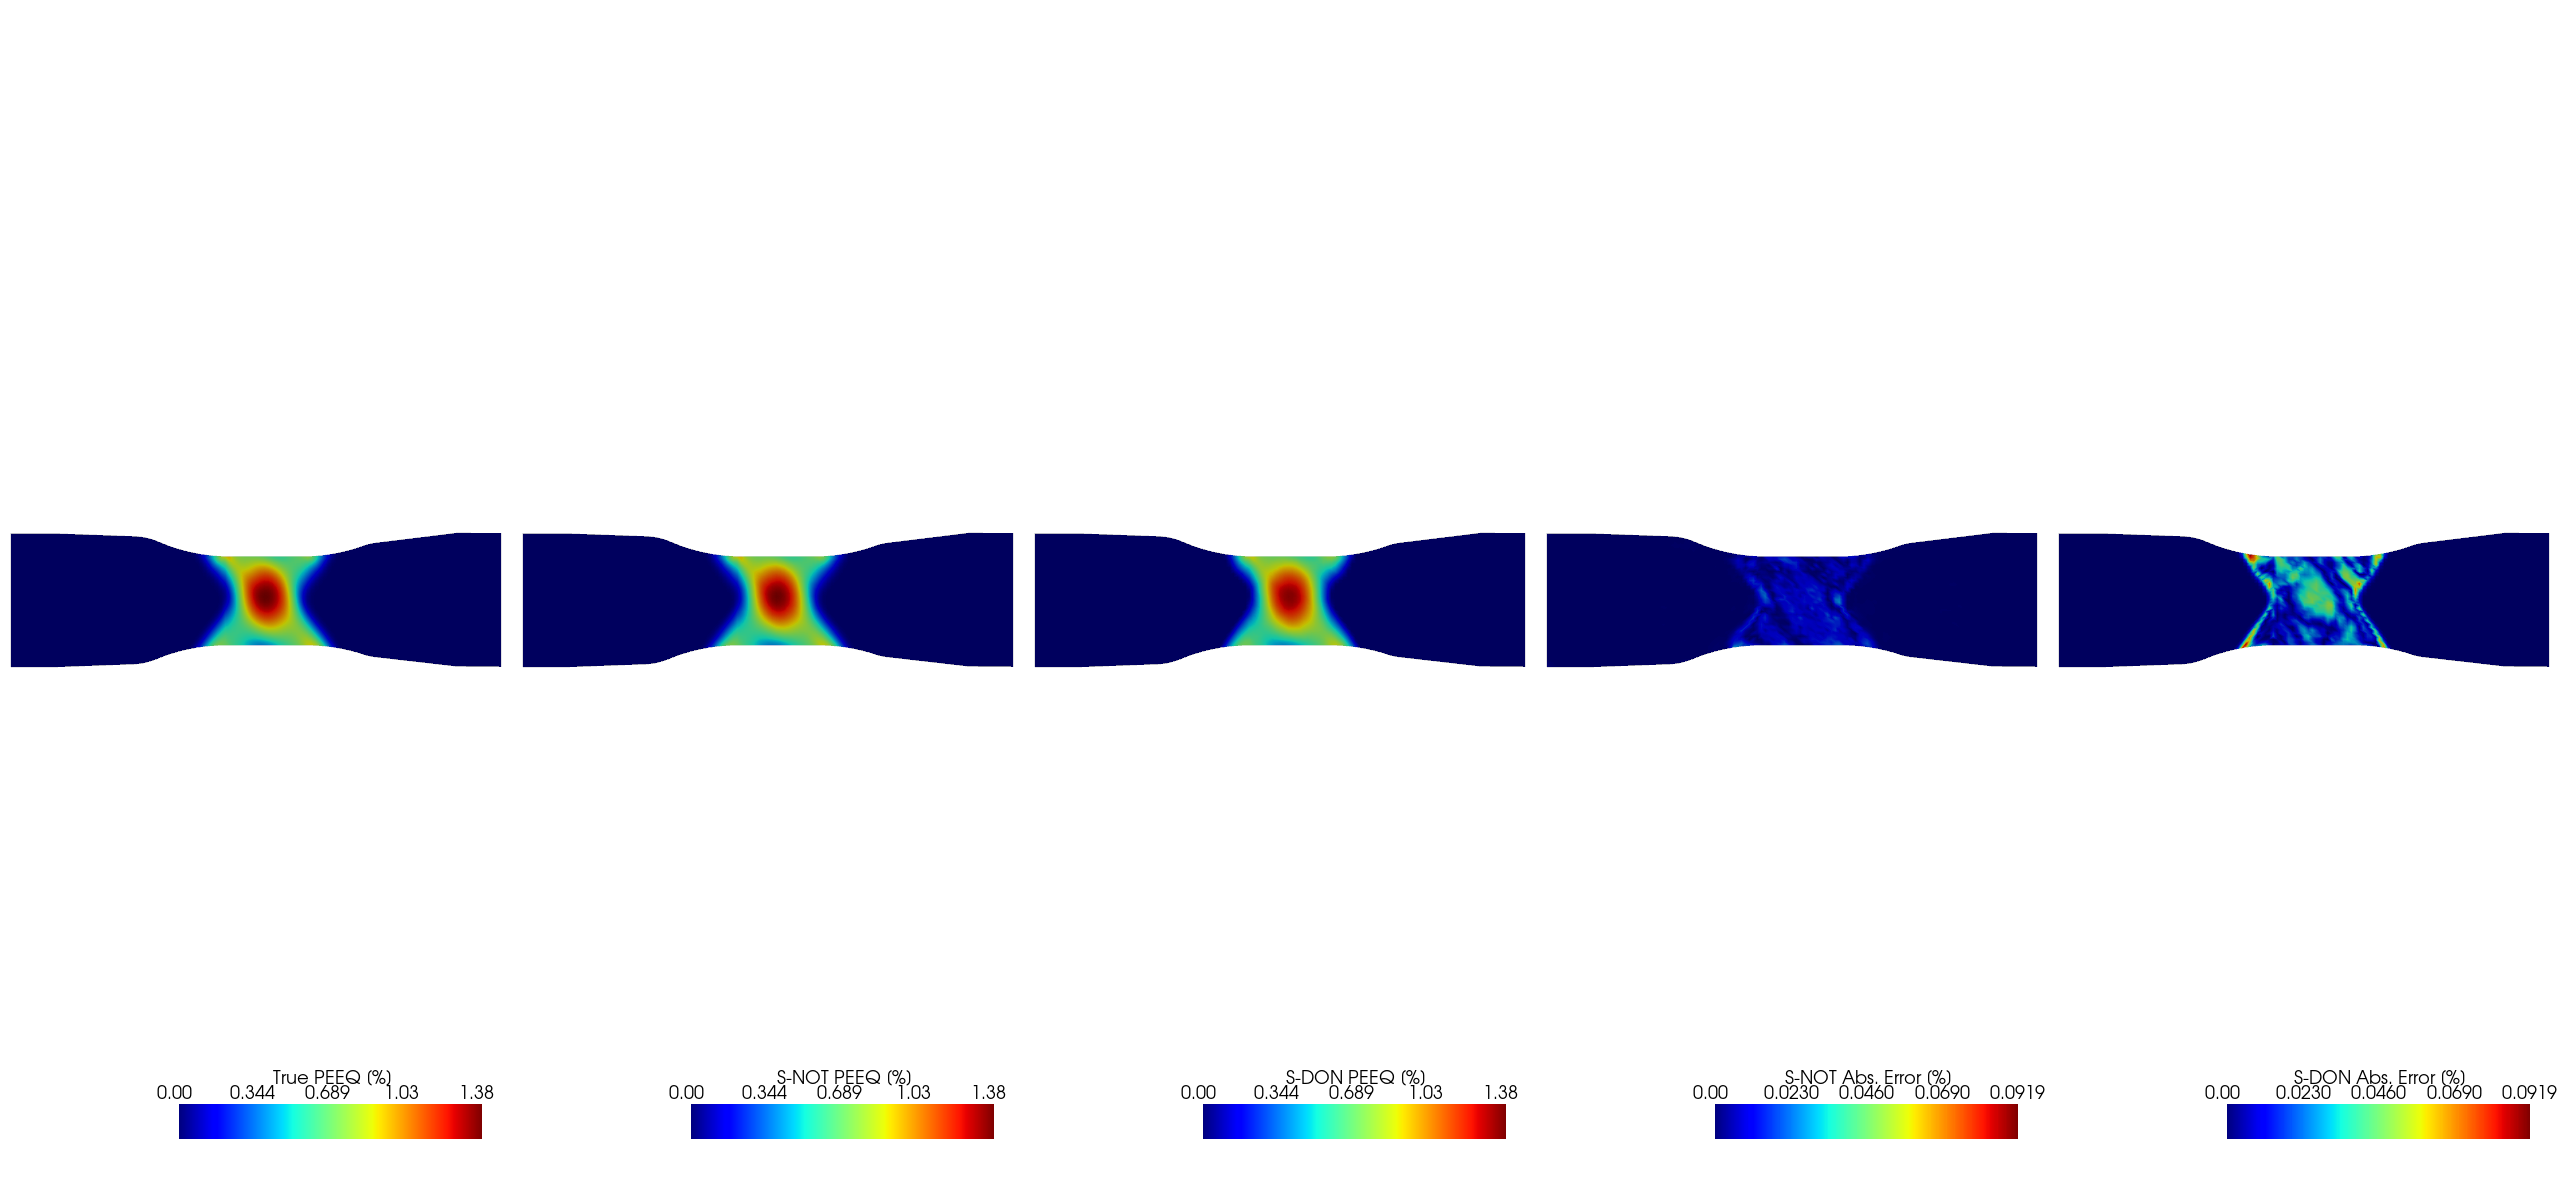

In [12]:
# plot 75th percentile of the MAE error of PEEQ
id = sort_idx_l2[int(0.75*len(sort_idx_l2))+1]
p_data = [peeq_true[id], peeq_pred_not[id], peeq_pred_don[id]]
plot_results(p_data, labels)


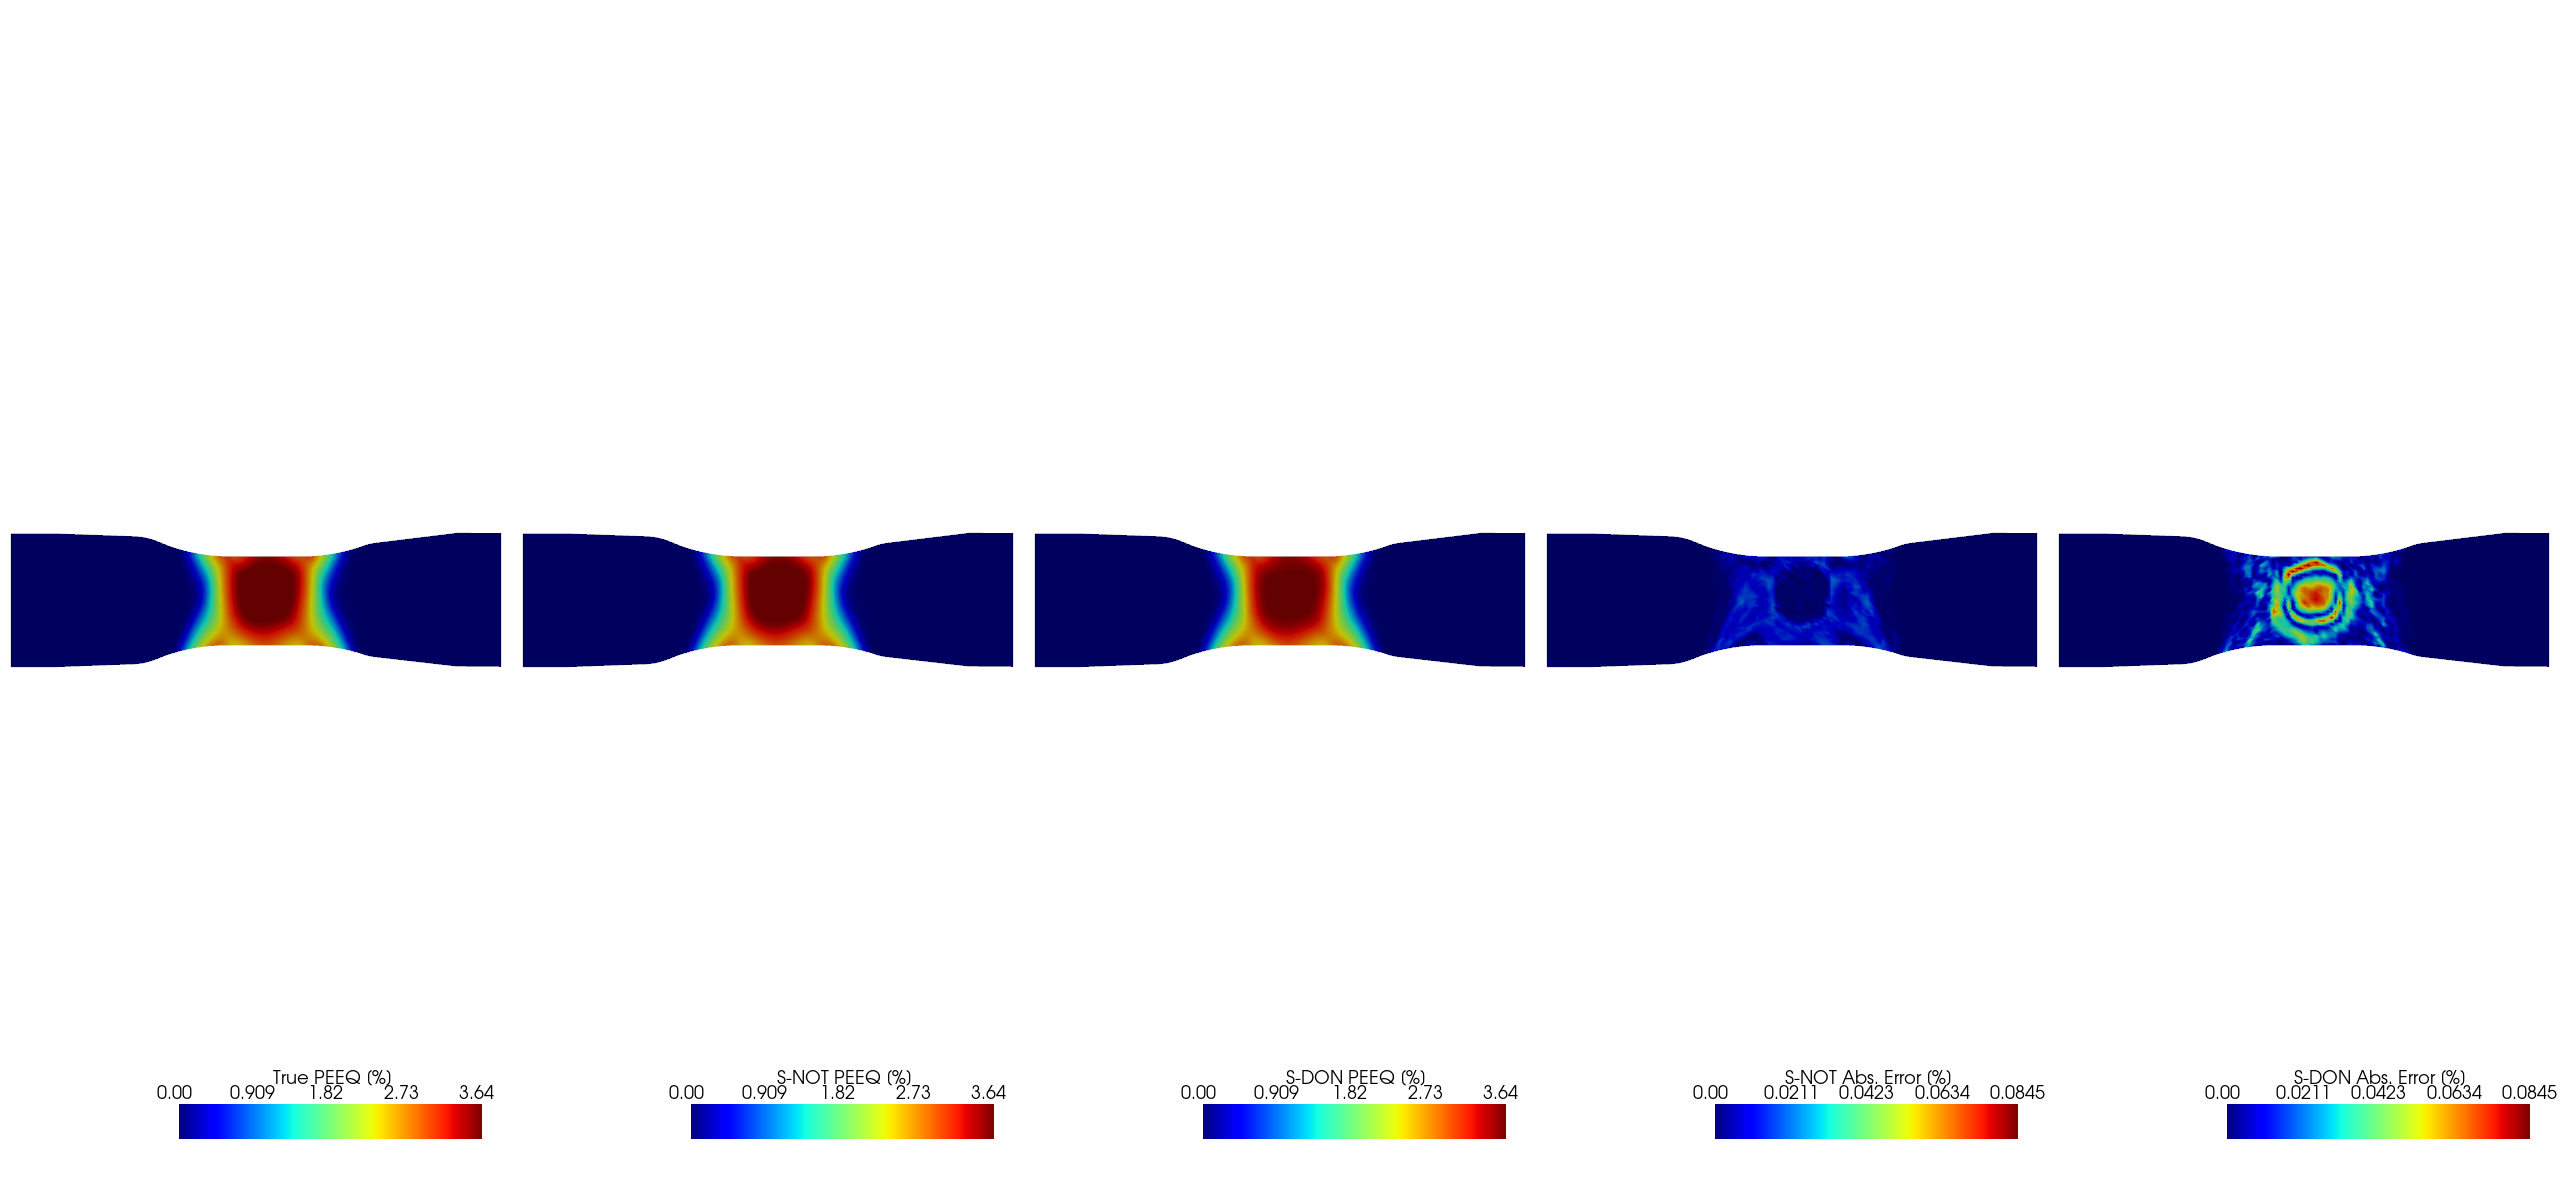

In [13]:
# plot 75th percentile of the MAE error of PEEQ
id = sort_idx_l2[int(0.50*len(sort_idx_l2))+1]
p_data = [peeq_true[id], peeq_pred_not[id], peeq_pred_don[id]]
plot_results(p_data, labels)